   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


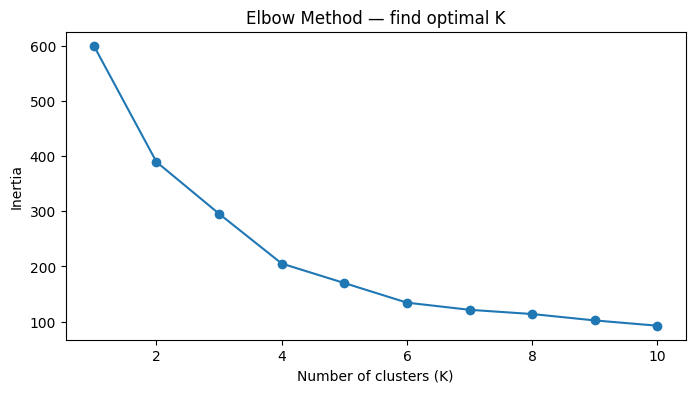

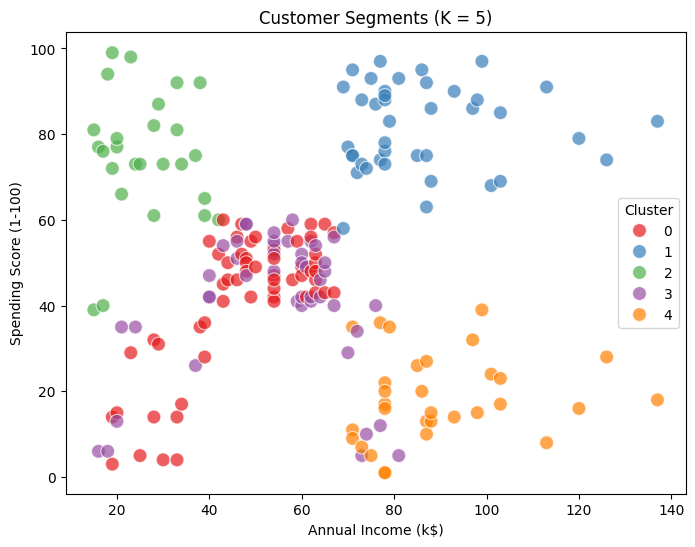

Cluster centers (scaled space):
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]
Cluster centers (original scale):
[[55.27586207 47.62068966 41.70689655]
 [32.875      86.1        81.525     ]
 [25.76923077 26.11538462 74.84615385]
 [26.73333333 54.31111111 40.91111111]
 [44.38709677 89.77419355 18.48387097]]
Number of customers in each cluster:
Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64


In [3]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data from a public URL
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
data = pd.read_csv(url)
print(data.head())

# 2. Choose relevant features (skip CustomerID, Gender for clustering)
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Normalize / Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Elbow method to choose K
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method — find optimal K")
plt.show()

# 5. Choose a K (e.g. K = 5) and run KMeans
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# 6. Visualize clusters (2D plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=data,
    s=100,
    alpha=0.7
)
plt.title(f"Customer Segments (K = {best_k})")
plt.show()

# 7. Print cluster centers (scaled / original) & counts
centers_scaled = kmeans.cluster_centers_
print("Cluster centers (scaled space):")
print(centers_scaled)

centers_original = scaler.inverse_transform(centers_scaled)
print("Cluster centers (original scale):")
print(centers_original)

print("Number of customers in each cluster:")
print(data['Cluster'].value_counts())
